## Installing the required packages for the bert topic modelling.

In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
# from jupytertehmes import jtplot


from sklearn.decomposition import TruncatedSVD, PCA, NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [ ]:
pip install little-mallet-wrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

Content Based Recomendation system:- Identifying the past user activity and using content attributes input, provide recommendation to user.
Knowledge Based Recomendation system:- Capturing explicit recomendations from the user and using domain knowledge as input, recommendation to 


## Importing the dataset and manuplating the dataset.

In [ ]:
from sklearn import datasets
dataa = datasets.fetch_20newsgroups()

In [ ]:
dataa

{'DESCR': '.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total 

In [ ]:
little_mallet_wrapper.print_dataset_stats(dataa.data)

Number of Documents: 11314
Mean Number of Words per Document: 287.5
Vocabulary Size: 280308


In [ ]:
dataa['Target'] = pd.Series(data=dataa)

In [ ]:
for idx in range(5):
  print(dataa.data[idx],'\n\n','#'*100, '\n\n')

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 

 #################################################################################################### 


From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article

In [ ]:
# put your data into a dataframe
news_df = pd.DataFrame({'News': dataa.data,
                       'Target': dataa.target})

# get dimensions of data 
news_df.shape

(11314, 2)

In [ ]:
news_df.head()

,News,Target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
# replace target names from target numbers in our news data frame
news_df['Target_name'] = news_df['Target'].apply(lambda x: dataa.target_names[x])

In [ ]:
docs = list(news_df.loc[:, "News"].values)


## Data Preprocessing using NLP techniques

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
import re

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# clean text data
# remove non alphabetic characters
# remove stopwords and lemmatize

def clean_text(sentence):
    # remove non alphabetic sequences
    pattern = re.compile(r'[^a-z]+')
    sentence = sentence.lower()
    sentence = pattern.sub(' ', sentence).strip()
    
    # Tokenize
    word_list = word_tokenize(sentence)
    
    # stop words
    stopwords_list = set(stopwords.words('english'))
    # puctuation
    # punct = set(string.punctuation)
    
    # remove stop words
    word_list = [word for word in word_list if word not in stopwords_list]
    # remove very small words, length < 3
    # they don't contribute any useful information
    word_list = [word for word in word_list if len(word) > 2]
    # remove punctuation
    # word_list = [word for word in word_list if word not in punct]
    
    # stemming
    # ps  = PorterStemmer()
    # word_list = [ps.stem(word) for word in word_list]
    
    # lemmatize
    lemma = WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    # list to sentence
    sentence = ' '.join(word_list)
    
    return sentence

# we'll use tqdm to monitor progress of data cleaning process
# create tqdm for pandas
tqdm.pandas()
# clean text data
news_df['News'] = news_df['News'].progress_apply(lambda x: clean_text(str(x)))

  0%|          | 0/11314 [00:00<?, ?it/s]

In [ ]:
news_df.head()

,News,Target,Target_name
0,lerxst wam umd edu thing subject car nntp post...,7,rec.autos
1,guykuo carson washington edu guy kuo subject c...,4,comp.sys.mac.hardware
2,twillis ecn purdue edu thomas willis subject q...,4,comp.sys.mac.hardware
3,jgreen amber joe green subject weitek organiza...,1,comp.graphics
4,jcm head cfa harvard edu jonathan mcdowell sub...,14,sci.space


In [ ]:
# replace target names from target numbers in our news data frame
news_df['Target_name'] = news_df['Target'].apply(lambda x: dataa.target_names[x])

In [ ]:
news_df.head()

,News,Target,Target_name
0,lerxst wam umd edu thing subject car nntp post...,7,rec.autos
1,guykuo carson washington edu guy kuo subject c...,4,comp.sys.mac.hardware
2,twillis ecn purdue edu thomas willis subject q...,4,comp.sys.mac.hardware
3,jgreen amber joe green subject weitek organiza...,1,comp.graphics
4,jcm head cfa harvard edu jonathan mcdowell sub...,14,sci.space


In [ ]:
news_df

,News,Target,Target_name
0,lerxst wam umd edu thing subject car nntp post...,7,rec.autos
1,guykuo carson washington edu guy kuo subject c...,4,comp.sys.mac.hardware
2,twillis ecn purdue edu thomas willis subject q...,4,comp.sys.mac.hardware
3,jgreen amber joe green subject weitek organiza...,1,comp.graphics
4,jcm head cfa harvard edu jonathan mcdowell sub...,14,sci.space
...,...,...,...
11309,jim zisfein factory com jim zisfein subject mi...,13,sci.med
11310,ebodin pearl tuft edu subject screen death mac...,4,comp.sys.mac.hardware
11311,westes netcom com estes subject mounting cpu c...,3,comp.sys.ibm.pc.hardware
11312,steve hcrlgw steven collins subject sphere poi...,1,comp.graphics


In [ ]:
news_df['News']

0        lerxst wam umd edu thing subject car nntp post...
1        guykuo carson washington edu guy kuo subject c...
2        twillis ecn purdue edu thomas willis subject q...
3        jgreen amber joe green subject weitek organiza...
4        jcm head cfa harvard edu jonathan mcdowell sub...
                               ...                        
11309    jim zisfein factory com jim zisfein subject mi...
11310    ebodin pearl tuft edu subject screen death mac...
11311    westes netcom com estes subject mounting cpu c...
11312    steve hcrlgw steven collins subject sphere poi...
11313    gunning cco caltech edu kevin gunning subject ...
Name: News, Length: 11314, dtype: object

In [ ]:
little_mallet_wrapper.print_dataset_stats(news_df['News'])

Number of Documents: 11314
Mean Number of Words per Document: 161.8
Vocabulary Size: 82279


In [ ]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in news_df['News']]

In [ ]:
len(training_data)

11314

In [ ]:
original_texts = [text for text in news_df['News']]

In [ ]:
len(original_texts)

11314

In [ ]:
news_df['Target_name'].unique()

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space',
       'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc',
       'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x',
       'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian',
       'talk.politics.mideast', 'talk.politics.misc', 'sci.crypt'],
      dtype=object)

In [ ]:
titles=news_df['Target_name'].unique()

In [ ]:
news_df['Target']

0         7
1         4
2         4
3         1
4        14
         ..
11309    13
11310     4
11311     3
11312     1
11313     8
Name: Target, Length: 11314, dtype: int64

In [ ]:
classes = [news_df['Target_name'][i] for i in news_df['Target']]

In [ ]:
classes

['comp.sys.ibm.pc.hardware',
 'sci.space',
 'sci.space',
 'comp.sys.mac.hardware',
 'misc.forsale',
 'comp.graphics',
 'sci.space',
 'comp.graphics',
 'comp.sys.mac.hardware',
 'sci.space',
 'comp.os.ms-windows.misc',
 'comp.windows.x',
 'sci.space',
 'misc.forsale',
 'sci.med',
 'rec.autos',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'talk.politics.guns',
 'rec.autos',
 'rec.motorcycles',
 'sci.med',
 'comp.sys.mac.hardware',
 'sci.space',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'alt.atheism',
 'comp.sys.ibm.pc.hardware',
 'sci.med',
 'sci.space',
 'comp.sys.mac.hardware',
 'rec.autos',
 'sci.electronics',
 'rec.motorcycles',
 'comp.os.ms-windows.misc',
 'talk.religion.misc',
 'comp.os.ms-windows.misc',
 'comp.graphics',
 'comp.sys.mac.hardware',
 'sci.space',
 'comp.graphics',
 'comp.sys.mac.hardware',
 'comp.sys.mac.hardware',
 'sci.space',
 'sci.space',
 'comp.os.ms-windows.misc',
 'comp.sys.mac.hardware'

In [ ]:
sentencesList= news_df['News'].tolist()

In [ ]:
sentencesList

['lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park line wondering anyone could enlighten car saw day door sport car looked late early called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please mail thanks brought neighborhood lerxst',
 'guykuo carson washington edu guy kuo subject clock poll final call summary final call clock report keywords acceleration clock upgrade article shelley qvfo innc organization university washington line nntp posting host carson washington edu fair number brave soul upgraded clock oscillator shared experience poll please send brief message detailing experience procedure top speed attained cpu rated speed add card adapter heat sink hour usage per day floppy disk functionality floppy especially requested summarizing next two day please add network knowledge base d

In [ ]:
little_mallet_wrapper.print_dataset_stats(sentencesList)

Number of Documents: 11314
Mean Number of Words per Document: 161.8
Vocabulary Size: 82279


In [ ]:
pip install little-mallet-wrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tomotopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [ ]:
little_mallet_wrapper.print_dataset_stats(sentencesList)

Number of Documents: 11314
Mean Number of Words per Document: 161.8
Vocabulary Size: 82279


In [ ]:
len(sentencesList)

11314

In [ ]:
training_data=sentencesList

In [ ]:
len(training_data)

11314

## Train Topic Model

In [ ]:
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 15

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
# this is 
for text in training_data:
    model.add_doc(text.strip().split())
    
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -9.853717478401336
Iteration: 10	Log-likelihood: -9.397694186720347
Iteration: 20	Log-likelihood: -9.225499860230382
Iteration: 30	Log-likelihood: -9.134580034359375
Iteration: 40	Log-likelihood: -9.077142935052512
Iteration: 50	Log-likelihood: -9.02958934523193
Iteration: 60	Log-likelihood: -8.99474314631903
Iteration: 70	Log-likelihood: -8.965686545383532
Iteration: 80	Log-likelihood: -8.936966720368384
Iteration: 90	Log-likelihood: -8.915752830533778

Topic Model Results:


✨Topic 0✨

edu com writes article organization subject line uiuc university apr sun pitt cso posting bank

✨Topic 1✨

file window program entry output widget motif set application line use sun code function get

✨Topic 2✨

god christian people say one believe bible edu church religion jesus would think law belief

✨Topic 3✨

max bhj giz chz bxn rlk qax scx air fij okz uww fyn nrhj biz

✨Topic 4✨

one said time day know say back two first went year people well

In [ ]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [ ]:
topic_distributions[1]

[0.0015178109,
 0.06376644,
 0.022125538,
 5.8814403e-05,
 0.20259964,
 0.0022133936,
 0.00058203196,
 0.064469814,
 0.011419999,
 0.23737945,
 0.25430334,
 0.00077935297,
 0.0013688508,
 0.0011205062,
 0.043013945,
 0.0014607529,
 0.00048063957,
 0.00075511023,
 0.053525623,
 0.037058953]

In [ ]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    sorted_data = sorted([(_distribution[topic_index], _document) 
                          for _distribution, _document 
                          in zip(topic_distributions, docs)], reverse=True)
    
    topic_words = topics[topic_index]
    
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    
    return

In [ ]:
get_top_docs(titles, topic_distributions, topic_index=3, n=6)

### ✨Topic 3✨

max bhj giz chz bxn rlk qax scx air fij okz uww fyn nrhj biz

---

✨  
**Topic Probability**: 0.00016482287901453674  
**Document**: rec.motorcycles



✨  
**Topic Probability**: 0.0001436065067537129  
**Document**: sci.electronics



✨  
**Topic Probability**: 9.813208453124389e-05  
**Document**: comp.sys.ibm.pc.hardware



✨  
**Topic Probability**: 7.98666660557501e-05  
**Document**: rec.autos



✨  
**Topic Probability**: 7.657741662114859e-05  
**Document**: talk.politics.misc



✨  
**Topic Probability**: 6.653067976003513e-05  
**Document**: misc.forsale



In [ ]:
get_top_docs(titles, topic_distributions, topic_index=1, n=6)

### ✨Topic 1✨

file window program entry output widget motif set application line use sun code function get

---

✨  
**Topic Probability**: 0.18418973684310913  
**Document**: sci.crypt



✨  
**Topic Probability**: 0.12995339930057526  
**Document**: sci.electronics



✨  
**Topic Probability**: 0.11227245628833771  
**Document**: soc.religion.christian



✨  
**Topic Probability**: 0.08008559048175812  
**Document**: comp.os.ms-windows.misc



✨  
**Topic Probability**: 0.06376644223928452  
**Document**: comp.sys.mac.hardware



✨  
**Topic Probability**: 0.020319897681474686  
**Document**: alt.atheism



In [ ]:
get_top_docs(titles, topic_distributions, topic_index=4, n=6)

### ✨Topic 4✨

one said time day know say back two first went year people well came last

---

✨  
**Topic Probability**: 0.3144742250442505  
**Document**: sci.electronics



✨  
**Topic Probability**: 0.2025996446609497  
**Document**: comp.sys.mac.hardware



✨  
**Topic Probability**: 0.11902277171611786  
**Document**: comp.graphics



✨  
**Topic Probability**: 0.1079840436577797  
**Document**: talk.politics.mideast



✨  
**Topic Probability**: 0.07467030733823776  
**Document**: rec.autos



✨  
**Topic Probability**: 0.06137939542531967  
**Document**: rec.sport.hockey



In [ ]:
get_top_docs(original_texts, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

file window program entry output widget motif set application line use sun code function get

---

✨  
**Topic Probability**: 0.9715591669082642  
**Document**: chongo toad com landon noll subject international obfuscated **code** contest opening part article toad expires may gmt reply chongo toad com uucp landon noll distribution world organization nebula consultant san francisco **line** enclosed rule guideline related information international obfuscated **code** contest part part shar **file** enjoy chongo landon curt noll larry bassel bin part multipart archive mkentry echo extracting mkentry text sed shar eof mkentry mkentry copyright landon curt noll larry bassel right reserved permission personal education non profit **use** granted provided copyright notice included entirety remains unaltered us must receive prior permission writing landon curt noll larry bassel mkentry make international obfuscated code contest **entry** usage mkentry remark build prog ioccc **entry** remark **file** remark entry build file containing prog built prog obfuscated **program** source file ioccc entry ioccc entry **output** file compile mkentry mkentry placed public domain landon curt noll software provided without express implied warranty including without limitation implied warranty merchantability fitness particular purpose warning **program** attempt implement ioccc rule every attempt made make sure program produce entry conforms contest rule case program differs contest rule contest rule used sure check contest rule submitting entry send question comment entry contest **sun** pacbell uunet pyramid hoptoad judge judge toad com rule guideline may often change year year sure current rule guideline prior submitting entry obtain send email address **use** subject send rule contest rule change year year one use program year intended sure rule year define match current year include stdio include ctype include time include sys type include sys stat logic ifndef true define true endif true ifndef false define false endif false define eof true define eof false global limit define rule year note match current year define start date mar utc first confirmation received define max col max column **line** hit define max build size max build size define max program size max program source size define max program size max program source size counting whitespace followed whitespace eof define max title len max char title define max entry len max length entry input line define max entry max number entry per person per year define max file len max filename length info file send entry define entry addr apple pyramid **sun** uunet hoptoad obfuscate define entry addr obfuscate toad com uuencode process assumes ascii define uuencode encode str int xff define uuencode len max uuencode chunk size define uuinfo mode mode info file uuencode file define uubuild mode mode build file uuencode file define uubuild name build name build file uuencode file define uuprog mode mode program uuencode file define uuprog name prog name program uuencode file encode str char val uuencoded character val xchar encode str abcdefghijklmnopqrstuvwxyz abcdefghijklmnopqrstuvwxyz abcdefghijklmnopqrstuvwxyz abcdefghijklmnopqrstuvwxyz global declaration xchar program name xlong start time startup time forward declaration xvoid parse args xvoid usage xfile open remark xfile open build xfile open program xfile open **output** xvoid output entry xvoid output remark xvoid output author xvoid output info xvoid output build xvoid output program xvoid output end xint **get** line xvoid output till dot xint col len xvoid check xvoid uuencode xmain argc argv int argc arg count char argv args file remark null open remark stream file build null open build file stream file prog null open program stream file output null open output stream char rname null file remark entry char bname null file containing prog built char pname null obfuscated program source file char oname null ioccc entry output file struct startup time structure check year start time time long gmtime start time year rule year fprintf stderr warning program applies may differ argv rule year year parse command line args parse args argc argv rname bname pname oname open check input output file open truncate output file first case one input file output open output oname remark open remark rname build open build bname prog open program pname output null remark null build null prog null exit output section output entry output oname output remark output oname remark rname output author output oname output info output oname output build output oname build bname output program output oname prog pname output end output oname flush output fflush output eof fprintf stderr flush error program oname perror exit final word printf nyour entry found check file oname printf correct problem verify uudecode utility printf correctly decode build file program printf program provided guide submitter printf case conflict rule rule shall apply printf responsibility ensure entry conforms printf current rule printf email entry printf entry addr printf entry addr printf please use following subject email entry printf tioccc entry done exit parse args parse command line args given command line args **function** par **set** required name flag **function** return command line syntax correct xvoid xparse args argc argv rname bname pname oname int argc arg count char argv args char rname file remark entry char bname file containing prog built char pname obfuscated program source file char oname ioccc entry output file char optarg flag option operand int flagname name flag int everyone getopt must parse args hand program argv argc determine flagname argv usage notreached flagname int argv determine flag operand flagname argv optarg argv else argc usage notreached else optarg argv save flag operand correct global variable switch flagname case rname optarg break case bname optarg break case pname optarg break case oname optarg break default usage notreached verify required flag rname null bname null pname null oname null usage notreached return usage print usage message exit function return xvoid xusage exitval int exitval exit value fprintf stderr usage remark build prog ioccc entry program fprintf stderr remark tfile remark entry fprintf stderr build tfile containing prog built fprintf stderr prog tthe obfuscated program source file fprintf stderr ioccc entry tioccc entry output file exit exitval open remark open check remark file remark file indented space extend beyond column max col requirement warn function return null format error xfile xopen remark filename char filename file stream opened file stream char buf bufsiz input buffer int toolong number line long int non indent number line indented space open remark input file stream fopen filename stream null fprintf stderr open remark file program filename perror return null look line fgets buf bufsiz stream null count line start space buf strncmp buf non indent count long line col len buf max col found line long toolong watch error check stream filename eof note long line needed toolong fprintf stderr warning line extend beyond column program toolong filename fprintf stderr would nice avoid program note non indented line needed non indent fprintf stderr warning line indented space program non indent filename fprintf stderr would nice avoid program return open file rewind stream return stream open build open check build file build file must longer max build size byte function return null size error xfile xopen build filename char filename file stream opened file stream struct stat statbuf status open file open build input file stream fopen filename stream null fprintf stderr open build file program filename perror return null determine size file fstat fileno stream statbuf fprintf stderr stat build file program filename perror return null statbuf size max build size fprintf stderr fatal build file byte long program filename statbuf size fprintf stderr may longer byte program max build size return null return open file return stream open program open check program source file program source file must byte number non whitespace char followed whitespace must byte function return null size error xfile xopen program filename char filename file stream opened file stream struct stat statbuf status open file int count special count size int character read open program source input file stream fopen filename stream null fprintf stderr open program source file program filename perror exit determine size file fstat fileno stream statbuf fprintf stderr stat program source file program filename perror return null statbuf size max program size fprintf stderr fatal program source file byte long program filename statbuf size fprintf stderr may longer byte program max program size return null count non whitespace non followed whitespace char count fgetc stream eof look non whitespace isascii isspace switch case count followed eof whitespace case case peek next char fgetc stream eof isascii isspace followed whitespace eof count ungetc stream count break default count break watch error check stream filename eof look special size count max program size fprintf stderr fatal number byte non whitespace program fprintf stderr followed whitespace program fprintf stderr eof must byte program max program size fprintf stderr byte found program filename count return null return open file rewind stream return stream open output open check entry output file function return null open error xfile xopen output filename char filename file stream opened file stream open ioccc entry output file stream fopen filename stream null fprintf stderr open ioccc entry file output program filename perror exit return open file return stream output entry output entry section read needed information form stdin write entry section xvoid xoutput entry output oname file output entry output file stream char oname name output file char title max title len entry title char buf max col buffer int entry entry number int ret field processed fscanf int line line char skip input skip file date pipe pipe date command time epoch sec second since epoch char write start section fprintf output entry check output oname eof write rule year fprintf output rule rule year check output oname eof determine fix printf fix update resubmittion printf previous entry enter **get** line buf buf buf printf nplease answer buf fprintf output fix check output oname eof printf nbe sure title entry number give printf entry replacing else fprintf output fix check output oname eof write title printf nyour title must match expression character printf followed character max title len printf suggested required title printf incorporate username printf case multiple author consider using part usernames printf author printf enter title prompt read line line get line title max title len max col printf ntitle long please enter continue verify pattern everyone regexp hand isascii int title isalnum int title title title printf ninvalid first character title printf enter title line else title isascii int isalnum int printf ninvalid character title printf enter title line line fprintf output title title check output oname eof write entry number printf neach person may submit entry per year max entry printf enter entry number inclusive max entry get valid input line fflush stdout ret fscanf stdin entry check stdin stdin eof skip input newline found skip fgetc stdin check stdin stdin eof skip bad text input invalidate entry number entry skip check number range ret entry entry max entry printf nthe entry number must inclusive max entry printf enter entry number ret entry entry max entry fprintf output entry entry check output oname eof write submission date return newline epoch sec time null fprintf output date asctime gmtime epoch sec check output oname eof write machine host information printf nenter machine entry tested output till dot output oname host output remark output remark section read needed information form stdin write entry section xvoid xoutput remark output oname remark rname file output entry output file stream char oname name output file file remark stream file containing remark text char rname name remark file char buf bufsiz input output buffer write start section fprintf output remark check output oname eof copy remark file section fgets buf bufsiz remark null fputs buf output check output oname eof check remark rname eof sure remark section end newline buf strlen buf fputc output check output oname eof output author output author section read needed information stdin write author section multiple author exist multiple author section written xvoid xoutput author output oname file output entry output file stream char oname name output file char buf max col buffer int auths true author note int auth cnt number author processed prompt user author section printf nenter information author entry printf contest deadline judge start date printf attempt email back confirmation first author place author information author individual section write start section fprintf output author check output oname eof write author printf nauthor name auth cnt get line buf max col max col printf nname long please enter fprintf output name buf check output oname eof write organization printf nenter school company organization author auth cnt printf nauthor org auth cnt get line buf max col max col printf nline long please enter fprintf output org buf check output oname eof write address printf nenter postal address author sure include auth cnt printf country include name output till dot output oname addr write email address printf nenter email address author use address auth cnt printf registered domain well known site give several printf form list one per line output till dot output oname email write anonymous status printf nshould author remain anonymous enter auth cnt get line buf buf buf printf nplease answer fprintf output anon buf check output oname eof determine another author printf ni another author enter get line buf buf buf printf nplease answer buf auths true else auths false auths true return output info output info section read needed information stdin write info section multiple info file exist multiple info section written xvoid xoutput info output oname file output entry output file stream char oname name output file char infoname max file len filename buffer char yorn answer char uuname name uuencode file infile info file stream prompt user info information printf ninfo file used supplement entry printf example info file may provide sample input detailed printf information entry supplemental printf entry require exist another info file save uuencode printf info file include enter get line yorn yorn yorn printf nplease answer yorn read filename printf nenter info filename get line infoname max file len printf ninfo filename long please enter compute basename info filename remove trailing newline uuname infoname strlen infoname uuname avoid rindex shrrchr compat issue hand uuname uuname infoname uuname uuname uuname break attempt open info file infile fopen infoname infile null fprintf stderr open info file program infoname perror continue write start section fprintf output info check output oname eof uuencode info file uuencode output oname infile infoname uuinfo mode uuname printf ndo another info file include enter get line yorn yorn yorn printf nplease answer return output build output build section read needed information stdin write build section xvoid xoutput build output oname build bname file output entry output file stream char oname name output file file build open build file stream char bname name build file write start section fprintf output build check output oname eof uuencode program file uuencode output oname build bname uubuild mode uubuild name return output program output program section read needed information form stdin write program section xvoid xoutput program output oname prog pname file output entry output file stream char oname name output file file prog open program stream char pname name program file write start section fprintf output program check output oname eof uuencode program file uuencode output oname prog pname uuprog mode uuprog name return output end output end section read needed information form stdin write end section xvoid xoutput end output oname file output entry output file stream char oname name output file write final section terminator fprintf output end check output oname eof return get line get answer stdin function flush stdout case prompt pending read answer function return line long length line including newline line function return error eof xint xget line buf siz maxcol char buf input buffer int siz length input including newline int maxcol max col allowed disable check int length length input line flush terminal output fflush stdout read line fgets buf siz stdin null report problem check stdin stdin eof look newline length strlen buf buf length int eatchar char eaten newline found line must long eat rest line eatchar fgetc stdin eatchar eof eatchar check stdin stdin eof report situation return watch long line needed maxcol length maxcol col len buf maxcol report situation return return length return length output till dot output **set** line read routine read set line including single line read format output leader tfirst line tnext line tnext line routine return error eof xvoid xoutput till dot output oname leader file output entry output file stream char oname name output file char leader lead text first line char buf bufsiz input buffer int count line read int done false true finished reading input instruct user input printf nto end input enter line single period read line eof count done issue prompt printf count leader fflush stdout get line get line buf bufsiz max col printf nline long please enter continue note read strcmp buf done true write line read something done fprintf output count leader buf check output oname eof line read least output something count fprintf output leader check output oname eof return col len determine highest string would reach given string routine return string would reach string printed column tab stop assumed start xint xcol len string char string string examine int col current column char current char scan string col string note column shift col col col col return highest column return col check check eof error stream return eof error xvoid xcheck stream name eof file stream stream check char name name stream int eof eof eof test error ferror stream fprintf stderr error program name perror exit test eof else eof eof feof stream fprintf stderr eof program name exit return uuencode uuencode file perform uuencoding process identical process performed uuencode utility routine implement algorithm described uuencode bsd reno man page xvoid xuuencode output oname infile iname umode uname file output output file stream char oname output filename file infile input file stream char iname input filename int umode mode put uuencode file char uname name put uuencode file char buf uuencode len uuencode buffer int read len actual number char read int val bit chunk buf char filler filler uuencode pad text char output initial uuencode header fprintf output begin umode uname check output oname eof clear input buffer buf buf sizeof buf sizeof buf process uuencode len char time forming single output line time read len fread buf sizeof buf uuencode len infile first character length character fputc uuencode read len output check output oname eof convert bit time thus convert set bit set uuencoded bit buf read len read len bit val fputc uuencode val output check output oname eof bit val fputc uuencode val output check output oname eof bit val fputc uuencode val output check output oname eof bit val fputc uuencode val output check output oname eof end uuencode len line fputc output check output oname eof clear input buffer depend bzero memset buf buf sizeof buf sizeof buf check last read input file check infile iname eof write end uuencode file fprintf output nend uuencode filler check output oname eof shar eof chmod mkentry echo restore mkentry failed set mkentry test echo original size current size obfuscate info echo extracting obfuscate info text sed shar eof obfuscate info obfuscated contest information xcopyright landon curt noll larry bassel xall right reserved permission personal education non profit use xgranted provided copyright notice included entirety xand remains unaltered us must receive prior permission writing xfrom landon curt noll larry bassel xthe international obfuscated code contest ioccc sprit xco operation willing mention programming content space xpermits xhow contest included file wish ioccc judge include contest file send request judge toad com request contest description limited line exceed byte typically request contest include current description ioccc order included file given year must receive current description earlier jan utc later feb utc agreement publish contest must also obtained prior feb annual contest fail submit new entry dropped file xofficial disclaimer pardon officialese content noted ioccc affiliated ioccc endorsed ioccc reserve right refuse print information given contest information provided particular contest organizer printed permission please contact contest organizer directly regarding content xwith official notice given present enjoyment following xinformation content international obfuscated contest original obfuscated contest obfuscate cated cating cates render obscure darken confuse emotion obfuscated judgment llat obfuscare darken intensive lat fuscare darken fuscus dark obfuscation obfuscatory adj goal contest write obscure obfuscated program rule show importance programming style ironic way stress compiler unusual code illustrate subtlety language provide safe forum poor code ioccc grandfather usenet programming contest since contest demonstrated program mearly work correctly sufficient ioccc also done much add arcane word obfuscated back english language see new hacker dictionary eric raymond strongly encouraged read new contest rule sending entry rule sometimes contest email address change time valid entry one year may rejected later year due change rule typical start date contest early march contest rule normally finalized posted beginning contest typical closing date contest early may contest rule posted comp unix wizard comp lang misc misc alt source comp source access group missed early march posting may request copy judge via email judge toad com sun uunet utzoo pyramid hoptoad judge previous contest winner available via anonymous ftp ftp net directory pub ioccc international obfuscated perl contest landon noll larry wall content planned someday landon larry busy actually get around posting first set rule landon say yes know said would contest existing project got way hopefully something developed nov international obfuscated postscript contest jonathan monsarrat jgm brown edu alena lacova alena nikhef contest programming skill knowledge exclusively postscript programming language purpose spread knowledge postscript detail applaud best trick prove human beat damnable machine generator game writing obscure mysterious postscript program ever winner receive fame attention go program entry posted winner programmer world wide contest rule result available ftp wilma brown edu pub postscript obfuscated shar individually obfuscated directory judge post rule november comp lang postscript usenet place send question jgm brown edu category include best obfuscated postscript best artwork compact best interactive program useful anything unusual creative deserves award judge choose winner category alena lacova system administrator nikhef institute high energy nuclear physic netherlands author postscript chaos program draw julia set mandelbrot set kind fractal function jonathan monsarrat graduate student mit brown university faq maintainer usenet newsgroup comp lang postscript author postscript zone lametex shar eof chmod obfuscate info echo restore obfuscate info failed set obfuscate info test echo original size current size exit sunnyvale resident vote landon noll sunnyvale city council seat



✨  
**Topic Probability**: 0.9636931419372559  
**Document**: chongo toad com landon noll subject reposting international obfuscated **code** contest rule expires may gmt reply chongo toad com landon noll distribution world organization nebula consultant san francisco **line** keywords ioccc received number request reposting international obfuscated **code** contest rule guideline also people requested rule posted wider **set** group sorry cross posting technical clarification made rule guideline see diff mark right hand edge rule guideline year remain people already process submitting **entry** ioccc need worry change chongo landon curt noll chongo toad com larry bassel lab **sun** com bin part multipart archive mkentry echo extracting mkentry text sed shar eof mkentry mkentry copyright landon curt noll larry bassel right reserved permission personal education non profit **use** granted provided copyright notice included entirety remains unaltered us must receive prior permission writing landon curt noll larry bassel mkentry make international obfuscated code contest **entry** usage mkentry remark build prog ioccc entry remark **file** remark entry build **file** containing prog built prog obfuscated **program** source file ioccc entry ioccc entry **output** file compile mkentry mkentry placed public domain landon curt noll software provided without express implied warranty including without limitation implied warranty merchantability fitness particular purpose warning **program** attempt implement ioccc rule every attempt made make sure program produce entry conforms contest rule case program differs contest rule contest rule used sure check contest rule submitting entry information may contact judge sending email following address apple pyramid **sun** uunet hoptoad judge address judge toad com submitting entry question comment contest welcome rule guideline may often change year year sure current rule guideline prior submitting entry obtain send email address **use** subject send rule one may obtain winner previous contest date via ftp host ftp net user anonymous pas yourname yourhost dir pub ioccc last resort previous winner may obtained sending email address please use subject send year winner year single digit year year range contest rule change year year one use program year intended sure rule year define match current year include stdio include ctype include time include sys type include sys stat logic ifndef true define true endif true ifndef false define false endif false define eof true define eof false global limit define rule year note match current year define start date mar utc first confirmation received define max col max column **line** hit define max build size max build size define max program size max program source size define max program size max program source size counting whitespace followed whitespace eof define max title len max char title define max entry len max length entry input line define max entry max number entry per person per year define max file len max filename length info file send entry define entry addr apple pyramid sun uunet hoptoad obfuscate define entry addr obfuscate toad com uuencode process assumes ascii define uuencode encode str int xff define uuencode len max uuencode chunk size define uuinfo mode mode info file uuencode file define uubuild mode mode build file uuencode file define uubuild name build name build file uuencode file define uuprog mode mode program uuencode file define uuprog name prog name program uuencode file encode str char val uuencoded character val xchar encode str abcdefghijklmnopqrstuvwxyz abcdefghijklmnopqrstuvwxyz abcdefghijklmnopqrstuvwxyz abcdefghijklmnopqrstuvwxyz global declaration xchar program name xlong start time startup time forward declaration xvoid parse args xvoid usage xfile open remark xfile open build xfile open program xfile open **output** xvoid output entry xvoid output remark xvoid output author xvoid output info xvoid output build xvoid output program xvoid output end xint **get** line xvoid output till dot xint col len xvoid check xvoid uuencode xmain argc argv int argc arg count char argv args file remark null open remark stream file build null open build file stream file prog null open program stream file output null open output stream char rname null file remark entry char bname null file containing prog built char pname null obfuscated program source file char oname null ioccc entry output file struct startup time structure check year start time time long gmtime start time year rule year fprintf stderr warning program applies may differ argv rule year year parse command line args parse args argc argv rname bname pname oname open check input output file open truncate output file first case one input file output open output oname remark open remark rname build open build bname prog open program pname output null remark null build null prog null exit output section output entry output oname output remark output oname remark rname output author output oname output info output oname output build output oname build bname output program output oname prog pname output end output oname flush output fflush output eof fprintf stderr flush error program oname perror exit final word printf nyour entry found check file oname printf correct problem verify uudecode utility printf correctly decode build file program printf program provided guide submitter printf case conflict rule rule shall apply printf responsibility ensure entry conforms printf current rule printf email entry printf entry addr printf entry addr printf please use following subject email entry printf tioccc entry done exit parse args parse command line args given command line args **function** par **set** required name flag **function** return command line syntax correct xvoid xparse args argc argv rname bname pname oname int argc arg count char argv args char rname file remark entry char bname file containing prog built char pname obfuscated program source file char oname ioccc entry output file char optarg flag option operand int flagname name flag int everyone getopt must parse args hand program argv argc determine flagname argv usage notreached flagname int argv determine flag operand flagname argv optarg argv else argc usage notreached else optarg argv save flag operand correct global variable switch flagname case rname optarg break case bname optarg break case pname optarg break case oname optarg break default usage notreached verify required flag rname null bname null pname null oname null usage notreached return usage print usage message exit function return xvoid xusage exitval int exitval exit value fprintf stderr usage remark build prog ioccc entry program fprintf stderr remark tfile remark entry fprintf stderr build tfile containing prog built fprintf stderr prog tthe obfuscated program source file fprintf stderr ioccc entry tioccc entry output file exit exitval open remark open check remark file remark file indented space extend beyond column max col requirement warn function return null format error xfile xopen remark filename char filename file stream opened file stream char buf bufsiz input buffer int toolong number line long int non indent number line indented space open remark input file stream fopen filename stream null fprintf stderr open remark file program filename perror return null look line fgets buf bufsiz stream null count line start space buf strncmp buf non indent count long line col len buf max col found line long toolong watch error check stream filename eof note long line needed toolong fprintf stderr warning line extend beyond column program toolong filename fprintf stderr would nice avoid program note non indented line needed non indent fprintf stderr warning line indented space program non indent filename fprintf stderr would nice avoid program return open file rewind stream return stream open build open check build file build file must longer max build size byte function return null size error xfile xopen build filename char filename file stream opened file stream struct stat statbuf status open file open build input file stream fopen filename stream null fprintf stderr open build file program filename perror return null determine size file fstat fileno stream statbuf fprintf stderr stat build file program filename perror return null statbuf size max build size fprintf stderr fatal build file byte long program filename statbuf size fprintf stderr may longer byte program max build size return null return open file return stream open program open check program source file program source file must byte number non whitespace char followed whitespace must byte function return null size error xfile xopen program filename char filename file stream opened file stream struct stat statbuf status open file int count special count size int character read open program source input file stream fopen filename stream null fprintf stderr open program source file program filename perror exit determine size file fstat fileno stream statbuf fprintf stderr stat program source file program filename perror return null statbuf size max program size fprintf stderr fatal program source file byte long program filename statbuf size fprintf stderr may longer byte program max program size return null count non whitespace non followed whitespace char count fgetc stream eof look non whitespace isascii isspace switch case count followed eof whitespace case case peek next char fgetc stream eof isascii isspace followed whitespace eof count ungetc stream count break default count break watch error check stream filename eof look special size count max program size fprintf stderr fatal number byte non whitespace program fprintf stderr followed whitespace program fprintf stderr eof must byte program max program size fprintf stderr byte found program filename count return null return open file rewind stream return stream open output open check entry output file function return null open error xfile xopen output filename char filename file stream opened file stream open ioccc entry output file stream fopen filename stream null fprintf stderr open ioccc entry file output program filename perror exit return open file return stream output entry output entry section read needed information form stdin write entry section xvoid xoutput entry output oname file output entry output file stream char oname name output file char title max title len entry title char buf max col buffer int entry entry number int ret field processed fscanf int line line char skip input skip file date pipe pipe date command time epoch sec second since epoch char write start section fprintf output entry check output oname eof write rule year fprintf output rule rule year check output oname eof determine fix printf fix update resubmittion printf previous entry enter **get** line buf buf buf printf nplease answer buf fprintf output fix check output oname eof printf nbe sure title entry number give printf entry replacing else fprintf output fix check output oname eof write title printf nyour title must match expression character printf followed character max title len printf suggested required title printf incorporate username printf case multiple author consider using part usernames printf author printf enter title prompt read line line get line title max title len max col printf ntitle long please enter continue verify pattern everyone regexp hand isascii int title isalnum int title title title printf ninvalid first character title printf enter title line else title isascii int isalnum int printf ninvalid character title printf enter title line line fprintf output title title check output oname eof write entry number printf neach person may submit entry per year max entry printf enter entry number inclusive max entry get valid input line fflush stdout ret fscanf stdin entry check stdin stdin eof skip input newline found skip fgetc stdin check stdin stdin eof skip bad text input invalidate entry number entry skip check number range ret entry entry max entry printf nthe entry number must inclusive max entry printf enter entry number ret entry entry max entry fprintf output entry entry check output oname eof write submission date return newline epoch sec time null fprintf output date asctime gmtime epoch sec check output oname eof write machine host information printf nenter machine entry tested output till dot output oname host output remark output remark section read needed information form stdin write entry section xvoid xoutput remark output oname remark rname file output entry output file stream char oname name output file file remark stream file containing remark text char rname name remark file char buf bufsiz input output buffer write start section fprintf output remark check output oname eof copy remark file section fgets buf bufsiz remark null fputs buf output check output oname eof check remark rname eof sure remark section end newline buf strlen buf fputc output check output oname eof output author output author section read needed information stdin write author section multiple author exist multiple author section written xvoid xoutput author output oname file output entry output file stream char oname name output file char buf max col buffer int auths true author note int auth cnt number author processed prompt user author section printf nenter information author entry printf contest deadline judge start date printf attempt email back confirmation first author place author information author individual section write start section fprintf output author check output oname eof write author printf nauthor name auth cnt get line buf max col max col printf nname long please enter fprintf output name buf check output oname eof write organization printf nenter school company organization author auth cnt printf nauthor org auth cnt get line buf max col max col printf nline long please enter fprintf output org buf check output oname eof write address printf nenter postal address author sure include auth cnt printf country include name output till dot output oname addr write email address printf nenter email address author use address auth cnt printf registered domain well known site give several printf form list one per line output till dot output oname email write anonymous status printf nshould author remain anonymous enter auth cnt get line buf buf buf printf nplease answer fprintf output anon buf check output oname eof determine another author printf ni another author enter get line buf buf buf printf nplease answer buf auths true else auths false auths true return output info output info section read needed information stdin write info section multiple info file exist multiple info section written xvoid xoutput info output oname file output entry output file stream char oname name output file char infoname max file len filename buffer char yorn answer char uuname name uuencode file infile info file stream prompt user info information printf ninfo file used supplement entry printf example info file may provide sample input detailed printf information entry supplemental printf entry require exist another info file save uuencode printf info file include enter get line yorn yorn yorn printf nplease answer yorn read filename printf nenter info filename get line infoname max file len printf ninfo filename long please enter compute basename info filename remove trailing newline uuname infoname strlen infoname uuname avoid rindex shrrchr compat issue hand uuname uuname infoname uuname uuname uuname break attempt open info file infile fopen infoname infile null fprintf stderr open info file program infoname perror continue write start section fprintf output info check output oname eof uuencode info file uuencode output oname infile infoname uuinfo mode uuname printf ndo another info file include enter get line yorn yorn yorn printf nplease answer return output build output build section read needed information stdin write build section xvoid xoutput build output oname build bname file output entry output file stream char oname name output file file build open build file stream char bname name build file write start section fprintf output build check output oname eof uuencode program file uuencode output oname build bname uubuild mode uubuild name return output program output program section read needed information form stdin write program section xvoid xoutput program output oname prog pname file output entry output file stream char oname name output file file prog open program stream char pname name program file write start section fprintf output program check output oname eof uuencode program file uuencode output oname prog pname uuprog mode uuprog name return output end output end section read needed information form stdin write end section xvoid xoutput end output oname file output entry output file stream char oname name output file write final section terminator fprintf output end check output oname eof return get line get answer stdin function flush stdout case prompt pending read answer function return line long length line including newline line function return error eof xint xget line buf siz maxcol char buf input buffer int siz length input including newline int maxcol max col allowed disable check int length length input line flush terminal output fflush stdout read line fgets buf siz stdin null report problem check stdin stdin eof look newline length strlen buf buf length int eatchar char eaten newline found line must long eat rest line eatchar fgetc stdin eatchar eof eatchar check stdin stdin eof report situation return watch long line needed maxcol length maxcol col len buf maxcol report situation return return length return length output till dot output set line read routine read set line including single line read format output leader tfirst line tnext line tnext line routine return error eof xvoid xoutput till dot output oname leader file output entry output file stream char oname name output file char leader lead text first line char buf bufsiz input buffer int count line read int done false true finished reading input instruct user input printf nto end input enter line single period read line eof count done issue prompt printf count leader fflush stdout get line get line buf bufsiz max col printf nline long please enter continue note read strcmp buf done true write line read something done fprintf output count leader buf check output oname eof line read least output something count fprintf output leader check output oname eof return col len determine highest string would reach given string routine return string would reach string printed column tab stop assumed start xint xcol len string char string string examine int col current column char current char scan string col string note column shift col col col col return highest column return col check check eof error stream return eof error xvoid xcheck stream name eof file stream stream check char name name stream int eof eof eof test error ferror stream fprintf stderr error program name perror exit test eof else eof eof feof stream fprintf stderr eof program name exit return uuencode uuencode file perform uuencoding process identical process performed uuencode utility routine implement algorithm described uuencode bsd reno man page xvoid xuuencode output oname infile iname umode uname file output output file stream char oname output filename file infile input file stream char iname input filename int umode mode put uuencode file char uname name put uuencode file char buf uuencode len uuencode buffer int read len actual number char read int val bit chunk buf char filler filler uuencode pad text char output initial uuencode header fprintf output begin umode uname check output oname eof clear input buffer buf buf sizeof buf sizeof buf process uuencode len char time forming single output line time read len fread buf sizeof buf uuencode len infile first character length character fputc uuencode read len output check output oname eof convert bit time thus convert set bit set uuencoded bit buf read len read len bit val fputc uuencode val output check output oname eof bit val fputc uuencode val output check output oname eof bit val fputc uuencode val output check output oname eof bit val fputc uuencode val output check output oname eof end uuencode len line fputc output check output oname eof clear input buffer depend bzero memset buf buf sizeof buf sizeof buf check last read input file check infile iname eof write end uuencode file fprintf output nend uuencode filler check output oname eof shar eof chmod mkentry echo restore mkentry failed set mkentry test echo original size current size obfuscate info echo extracting obfuscate info text sed shar eof obfuscate info obfuscated contest information xcopyright landon curt noll larry bassel xall right reserved permission personal education non profit use xgranted provided copyright notice included entirety xand remains unaltered us must receive prior permission writing xfrom landon curt noll larry bassel xthe international obfuscated code contest ioccc sprit xco operation willing mention programming content space xpermits xhow contest included file wish ioccc judge include contest file send request judge toad com request contest description limited line exceed byte typically request contest include current description ioccc order included file given year must receive current description earlier jan utc later feb utc agreement publish contest must also obtained prior feb annual contest fail submit new entry dropped file xofficial disclaimer pardon officialese content noted ioccc affiliated ioccc endorsed ioccc reserve right refuse print information given contest information provided particular contest organizer printed permission please contact contest organizer directly regarding content xwith official notice given present enjoyment following xinformation content international obfuscated contest original obfuscated contest obfuscate cated cating cates render obscure darken confuse emotion obfuscated judgment llat obfuscare darken intensive lat fuscare darken fuscus dark obfuscation obfuscatory adj goal contest write obscure obfuscated program rule show importance programming style ironic way stress compiler unusual code illustrate subtlety language provide safe forum poor code ioccc grandfather usenet programming contest since contest demonstrated program simply work correctly sufficient ioccc also done much add arcane word obfuscated back english language see new hacker dictionary eric raymond strongly encouraged read new contest rule sending entry rule sometimes contest email address change time valid entry one year may rejected later year due change rule typical start date contest early march contest rule normally finalized posted beginning contest typical closing date contest early may rule guideline may often change year year sure current rule guideline prior submitting entry obtain send email address use subject send rule one may obtain winner previous contest date via ftp host ftp net user anonymous pas yourname yourhost dir pub ioccc last resort previous winner may obtained sending email address please use subject send year winner year single digit year year range international obfuscated perl contest landon noll larry wall content planned someday landon larry busy actually get around posting first set rule landon say yes know said would contest existing project got way hopefully something developed nov international obfuscated postscript contest jonathan monsarrat jgm brown edu alena lacova alena nikhef contest programming skill knowledge exclusively postscript programming language purpose spread knowledge postscript detail applaud best trick prove human beat damnable machine generator game writing obscure mysterious postscript program ever winner receive fame attention go program entry posted winner programmer world wide contest rule result available ftp wilma brown edu pub postscript obfuscated shar individually obfuscated directory judge post rule november comp lang postscript usenet place send question jgm brown edu category include best obfuscated postscript best artwork compact best interactive program useful anything unusual creative deserves award judge choose winner category alena lacova system administrator nikhef institute high energy nuclear physic netherlands author postscript chaos program draw julia set mandelbrot set kind fractal function jonathan monsarrat graduate student mit brown university faq maintainer usenet newsgroup comp lang postscript author postscript zone lametex shar eof chmod obfuscate info echo restore obfuscate info failed set obfuscate info test echo original size current size exit sunnyvale resident vote landon noll sunnyvale city council seat



✨  
**Topic Probability**: 0.8710640668869019  
**Document**: barnett grymoire crd com bruce barnett subject title xterm reply lanzo tekelec com message thu apr gmt nntp posting host grymoire crd com reply barnett crdgw com organization corp schenectady aeon berlin apr gecko uucp article apr gecko uucp lanzo tekelec com mark lanzo writes hint **sun** user **use** usr bin echo instead bin echo csh built echo otherwise embed literal esc bel character string instead using convenient octal sequence bad idea using usr bin echo slower built echo execute hostname per shell **window** read one extra **file** manipluating title require executing extra **program** yes execute **program** per system store **file** next time hostname setenv hostname hostname endif figure generate escape bell echo command without **line** terminator may done variable **set** executed script system echo already **set** echo variable dev tty else echo hostname source echo hostname else echo echo built echo bsd dev tty berkeley style echo echo set ech echo echo hostname echo set echo echo hostname echo set echo echo hostname echo set echo hostname source echo hostname else echo built echo sysv dev tty echo set ech echo echo hostname echo set echo hostname echo set echo hostname echo set echo hostname source echo hostname endif using shelltool cmdtool xterm duplicate alias avoid problem term **sun** sun alias alias header ech alias iheader ech else term xterm alias header ech alias iheader ech endif bruce barnett barnett crd com uunet crdgw barnett



✨  
**Topic Probability**: 0.8334090709686279  
**Document**: rogerskm eplrx dupont com karen rogers subject remapping return key dialog organization dupont central research development **line** new programming please bear trying dialog box return value upon user entering new value hitting return key want done button piece **code** work exclude xtnvalue argument work someone shed light suggest better way ultimately several area active time allow user modify parameter **program** thanks help karen rogers dupont rogerskm pluto dupont com **code** start void doit printf entered doit **function** exit main argc argv int argc char argv **widget** toplevel **widget** outer xtappcontext app con widget sample arg args static xtactionsrec key action doit doit toplevel xtvaappinitialize app con test null argc argv null null outer xtcreatemanagedwidget paned panedwidgetclass toplevel null zero xtappaddactions app con key action xtnumber key action xtsetarg args xtnlabel enter value xtsetarg args xtnvalue sample xtcreatemanagedwidget sample dialogwidgetclass outer args xtoverridetranslations sample xtparsetranslationtable key return doit xtrealizewidget toplevel xtappmainloop app con



✨  
**Topic Probability**: 0.8057345747947693  
**Document**: ninassup athena mit edu nikos nassuphis subject lga ncrypt source organization massachusetts institute technology **line** nntp posting host mit edu got number request **code** written asm borland tasm tasm lga asm tlink lga asm **code** lga ncryption nick nassuphis code segment assume code code org start jmp begin gas particle assigment bit particle moving east bit particle moving west bit particle moving north bit particle moving south bit particle moving east bit particle moving west bit particle moving north bit particle moving south collisiong rule gas rule nibble byte reflection rule swap bit along direction look table implement two particle collision hpp lattice gas hpprule rule implement velocity reversal needed run gas evolution reverse called wallrule particle hit wall head wallrule maxbyte equ lineno equ srcptr offset buffer desptr offset buffer savebuff maxbyte lineno dup buffer maxbyte lineno dup dup buffer maxbyte lineno dup dup data test lattice gas based encryption algorithm data encoded particle digital gas whose time evolution simulated cellular automaton type algorithm decryption achieved running simulation reverse thermodynamic argument ensures even single bit flipped decryption data possible gas let evolve timesteps one either run reverse evolution pressing space flip bit run pressing cryptographic **application** key would consist number time step time location specific bit inversion fill gas piece code initgas mov srcptr mov offset data mov lineno push push mov maxbyte mov mov inc inc loop pop pop add maxbyte loop mov srcptr mov offset initgas mov maxbyte mov mov byte ptr inc loop ret display gas molecule bouncing around showgas push push push push push mov mov mov srcptr mov mov lineno add maxbyte push push mov maxbyte mov mov byte ptr inc add dec jnz pop pop add loop pop pop pop pop pop ret sourse data destination data scanonemiddleline first byte special case warparound mov assembled byte mov maxbyte north one **line** lower bit assembled byte mov maxbyte south one line higher bit place stuff mov maxbyte west one byte left lower bit mov east one byte right higher bit mov mov byte ptr offset hpprule mov inc inc middle byte handled loop mov maxbyte sol mov assembled byte mov maxbyte north one line lower bit assembled byte mov maxbyte south one line higher bit place stuff mov west one byte left lower bit mov east one byte right higher bit mov mov byte ptr offset hpprule mov inc inc loop sol last byte also special mov assembled byte mov maxbyte north one line lower bit assembled byte mov maxbyte south one line higher bit place stuff mov west one byte left lower bit mov maxbyte east one byte right higher bit mov mov byte ptr offset hpprule mov inc inc ret sourse data destination data scanfirstline first byte special case warparound mov mov maxbyte lineno bit assembled byte mov maxbyte bit place stuff mov maxbyte west one byte left lower bit mov east one byte right higher bit mov mov byte ptr offset hpprule mov inc inc middle byte handled loop mov maxbyte sfl mov assembled byte mov maxbyte lineno bit assembled byte mov maxbyte bit place stuff mov west one byte left lower bit mov east one byte right higher bit mov mov byte ptr offset hpprule mov inc inc loop sfl last byte also special mov assembled byte mov maxbyte lineno bit assembled byte mov maxbyte bit place stuff mov west one byte left lower bit mov maxbyte east one byte right higher bit mov mov byte ptr offset hpprule mov ret sourse data destination data scanlastline first byte special case warparound mov assembled byte mov maxbyte bit assembled byte mov maxbyte lineno bit place stuff mov maxbyte west one byte left lower bit mov east one byte right higher bit mov mov byte ptr offset hpprule mov inc inc middle byte handled loop mov maxbyte sll mov assembled byte mov maxbyte bit assembled byte mov maxbyte lineno bit place stuff mov west one byte left lower bit mov east one byte right higher bit mov mov byte ptr offset hpprule mov inc inc loop sll last byte also special mov assembled byte mov maxbyte bit assembled byte mov maxbyte lineno bit place stuff mov west one byte left lower bit mov maxbyte east one byte right higher bit mov mov byte ptr offset hpprule mov inc inc ret invert velocity gas invertall push push push mov srcptr mov mov lineno push mov maxbyte mov mov byte ptr offset wallrule mov inc loop pop loop pop pop pop ret iterateonce mov srcptr mov desptr mov srcptr mov desptr push push call scanfirstline pop pop add maxbyte add maxbyte mov lineno dont scan first last push push push call scanonemiddleline pop pop pop add maxbyte add maxbyte loop push push call scanlastline pop pop ret iterate hpp rule time iterate push call iterateonce pop call showgas loop iterate ret iterate hpp rule time iterateuntil mov mov offset offset mov byte ptr offset xor byte ptr offset inc loop call iterateonce call showgas mov srcptr mov maxbyte mov mov mov mov byte ptr mov byte ptr wallrule xor inc loop mov mov offset offset mov byte ptr offset xor byte ptr offset inc loop jmp mov offset push ret dup push push push push push mov mov msgptr int pop pop pop pop pop ret dup msgptr offset msg msg message printed code decrypted using data lattice applied decoding routine every time step decoding **function** left code unchanged except gas evolution completelly reversed thermalization time equ repetition enough equilibrate gas begin mov mov mov mov mov int mov mov mov mov int call initgas call showgas mov int push mov time call iterate call invertall call showgas mov int cmp jne begin mov srcptr xor byte ptr begin mov time call iterateuntil call invertall call showgas mov int code end end start



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels, 
                                      topic_distributions, 
                                      topic_keys, 
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):
    
    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', 
                                     columns='Topic', 
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()
        
    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)    
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [ ]:
target_labels = ['rec.autos', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space',
       'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc',
       'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x',
       'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian',
       'talk.politics.mideast', 'talk.politics.misc', 'sci.crypt']

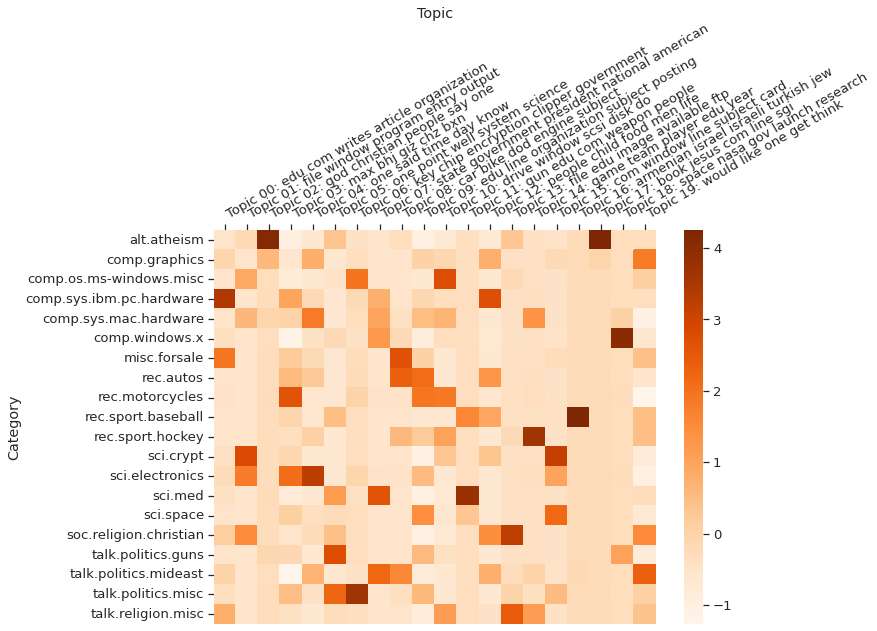

In [ ]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Oranges',
                                 dim=(12,9))
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous